<h1>Content table<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif-de-l'étude" data-toc-modified-id="Objectif-de-l'étude-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif de l'étude</a></span><ul class="toc-item"><li><span><a href="#Mission" data-toc-modified-id="Mission-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Mission</a></span></li></ul></li><li><span><a href="#Importation-des-librairies-et-fonctions" data-toc-modified-id="Importation-des-librairies-et-fonctions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importation des librairies et fonctions</a></span><ul class="toc-item"><li><span><a href="#Librairies" data-toc-modified-id="Librairies-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Les-fonctions" data-toc-modified-id="Les-fonctions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Les fonctions</a></span></li></ul></li><li><span><a href="#Lecture-et-analyse-du-jeux-de-données" data-toc-modified-id="Lecture-et-analyse-du-jeux-de-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lecture et analyse du jeux de données</a></span><ul class="toc-item"><li><span><a href="#Fichier-2016(-fichier-de-référence)" data-toc-modified-id="Fichier-2016(-fichier-de-référence)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fichier 2016( fichier de référence)</a></span></li><li><span><a href="#Nettoyage-du-jeu-de-données" data-toc-modified-id="Nettoyage-du-jeu-de-données-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Nettoyage du jeu de données</a></span></li><li><span><a href="#Explication-des-variables" data-toc-modified-id="Explication-des-variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Explication des variables</a></span></li><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Multivariate-Analysis" data-toc-modified-id="Multivariate-Analysis-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Multivariate Analysis</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Création-de-nouvelles-variables" data-toc-modified-id="Création-de-nouvelles-variables-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Création de nouvelles variables</a></span></li><li><span><a href="#Traitement,-supression-des-variables" data-toc-modified-id="Traitement,-supression-des-variables-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Traitement, supression des variables</a></span></li><li><span><a href="#Normalisation-et-dummisation-de-la-data" data-toc-modified-id="Normalisation-et-dummisation-de-la-data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Normalisation et dummisation de la data</a></span></li></ul></li></ul></div>

# Objectif de l'étude


La ville de Seattle s’intéresse de près aux émissions des bâtiments non destinés à l’habitation d'ici 2050. Des relevés minutieux ont été effectués en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous devons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées. Aussi nous devons évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions.

## Mission

# Importation des librairies et fonctions

## Librairies

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)
import ast
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import preprocessing
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler





## Les fonctions

In [97]:
def nbr_lignes(data):
       return len(data)
    
def nbr_columns(data):
    return len(data.columns)

#fonction qui concerne les lignes dupliquées + % 
def count_duplicates_rows(data):    
    return len(data)-len(data.drop_duplicates())

def count_duplicates_rows_percent(data):
    return count_duplicates_rows(data)/nbr_lignes(data)

# fonction qui excute une trame de données en entrée et renvoie le nombre de cellules manquantes + %
def cellules_manquantes(data):
    return data.isna().sum().sum()

#fonction prenant une dataframe en entrée et renvoie le pourcentage de cellules manquantes
def cellules_manquantes_percent(data):
    return data.isna().sum().sum()/(data.size)

# fonction qui renvoie le nom de la variable dans l’espace de noms 
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

#fonction qui renvoi les variables en dataframe
def dataset_columns(data):
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('Columns : {}'.format(data.columns.values))


# Fonction permattant de calculer la somme et le pourcentage des valeurs manquantes 

def missing_values_1(df):

    total = df.isnull().sum()   # Calcul du total des valeurs manquantes
    percent = round(df.isnull().sum()/df.isnull().count()*100,1) # Calcul le pourcentage des valeurs arrondi
      
    missing_data = pd.concat([total,percent],axis =1, keys=['Total','Ratio_of_NA(%)']) 
    type=pd.DataFrame(df[missing_data.index].dtypes, columns=['Types'])
    missing_data=pd.concat([missing_data,type],axis=1)
    missing_data=missing_data.sort_values('Total',ascending=False)
    missing_data.head(15)
    print( "le total des valeurs manquantes est", total.sum()) #Afficher la somme total des valeurs manquantes
    print(percent) #afficher le poucentage
    print(missing_data.head())
    print()
    print(set(missing_data['Types']))
    print()
    print("---Categorical columns---")
    
    print(missing_data[missing_data['Types']=="object"].index) # Colonnes ayant des variables qualitatives
    print()
    print("---Numerical columns----")
    print(missing_data[missing_data['Types'] !="object"].index)  # Colonnes ayant des variables quantitatives
    
    
# fonction qui prend le trame de données en entrée et en sortie un cadre de données contenant des variables, le nombre de valeurs manquantes et le % de valeurs manquantes'''
def missing_values(data):
    summary = pd.DataFrame(columns=['Variable name', 'Missing values', '% Missing'])
    summary['Variable name']=data.columns
    missing = list()
    percent_missing = list()
    for var in data.columns:
        nb_missing = cellules_manquantes(data[var])
        pc_missing = cellules_manquantes_percent(data[var])
        missing.append(nb_missing)
        percent_missing.append(pc_missing)
    summary['Missing values'] = list(missing)
    summary['% Missing'] = list(percent_missing)
    return summary

# fonction qui génère la sortie de la méthode columns_type dans le fichier csv 
def output_dataframe_variable_types(data):
   
    summary = columns_type(data)
    summary.to_csv('output_dataframe_{}_variable_types.csv'.format(namestr(data, globals())),sep=',', index = False)
    

# fonction vue d'ensemble de la DataFrame: résumé contenant nombre de lignes, de colonnes, de cellules manquantes et de lignes en double
   
def data_set_overview(data):    
    print('--------------------------------------------------------------------------')
    print('Data : {}'.format(namestr(data, globals())))
    print('Nbr de variables : {}'.format(nbr_columns(data)))
    print('Nbr d observations : {}'.format(nbr_lignes(data)))
    print('cellules_manquantes : {}'.format(cellules_manquantes(data)))
    print('cellules_manquantes in % : {:.2%}'.format(cellules_manquantes_percent(data)))
    print('Duplicate rows : {}'.format(count_duplicates_rows(data)))
    print('Duplicate rows in % : {:.2%}'.format(count_duplicates_rows_percent(data)))
    

def search_componant(df, suffix=None):
    componant = []
    for col in df.columns:
        if suffix in col: 
            componant.append(col)
    return componant
    
  
# Fonction prenant une trame de données en entrée et renvoyant un résumé contenant nom de la variable, type
def columns_type(data): 
    
    df = pd.DataFrame(data.dtypes)[0]
    summary = pd.DataFrame(columns=['noms Variables', 'type Variable'])
    summary['noms Variables']=data.columns
    summary['type Variable']=list(df)
    return summary

   
def drop_unpopulated_column(data,limit):
    summary = missing_values(data)
    logical = list()
    for row in summary.iterrows():
        if float(row[1]['% Missing'])>float(limit):
            # to be dropped
            print('Dropping variable {} from  {} with % missing {}'.format(row[1]['Variable name'],namestr(data, globals()),round(float(row[1]['% Missing']),2)))
            logical.append(False)
        else:
            #kept
            logical.append(True)
        
    columns_to_keep = summary[logical]['Variable name']
    
    return data[columns_to_keep]


#Crée rapidement des DataFrame
def make_df(columns, index):
    
    data = {c: [str(c) + str(i) for i in index]
            for c in cols}
    return pd.DataFrame(data, index)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)



# Lecture et analyse du jeux de données

## Fichier 2016( fichier de référence)

In [98]:
#Let's load and show a few rows of our data
df = pd.read_csv('./2016-building-energy-benchmarking.csv')
df.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1156514.25,3946027.0,12764.5293,1276453.0,False,NaN,Compliant,NaN,249.98,2.83


In [99]:
missing_values_1(df)

le total des valeurs manquantes est 19952
OSEBuildingID                        0.0
DataYear                             0.0
BuildingType                         0.0
PrimaryPropertyType                  0.0
PropertyName                         0.0
Address                              0.0
City                                 0.0
State                                0.0
ZipCode                              0.5
TaxParcelIdentificationNumber        0.0
CouncilDistrictCode                  0.0
Neighborhood                         0.0
Latitude                             0.0
Longitude                            0.0
YearBuilt                            0.0
NumberofBuildings                    0.2
NumberofFloors                       0.0
PropertyGFATotal                     0.0
PropertyGFAParking                   0.0
PropertyGFABuilding(s)               0.0
ListOfAllPropertyUseTypes            0.3
LargestPropertyUseType               0.6
LargestPropertyUseTypeGFA            0.6
SecondLargestPr

In [100]:
data_set_overview(df)

--------------------------------------------------------------------------
Data : ['df']
Nbr de variables : 46
Nbr d observations : 3376
cellules_manquantes : 19952
cellules_manquantes in % : 12.85%
Duplicate rows : 0
Duplicate rows in % : 0.00%


## Nettoyage du jeu de données

In [101]:
df.dropna(how = 'all', axis=0, inplace=True)
df.shape

(3376, 46)

In [102]:
df.replace([np.inf, -np.inf], 0, inplace=True)

<AxesSubplot:title={'center':'Proportion de NaN par variable (%)'}>

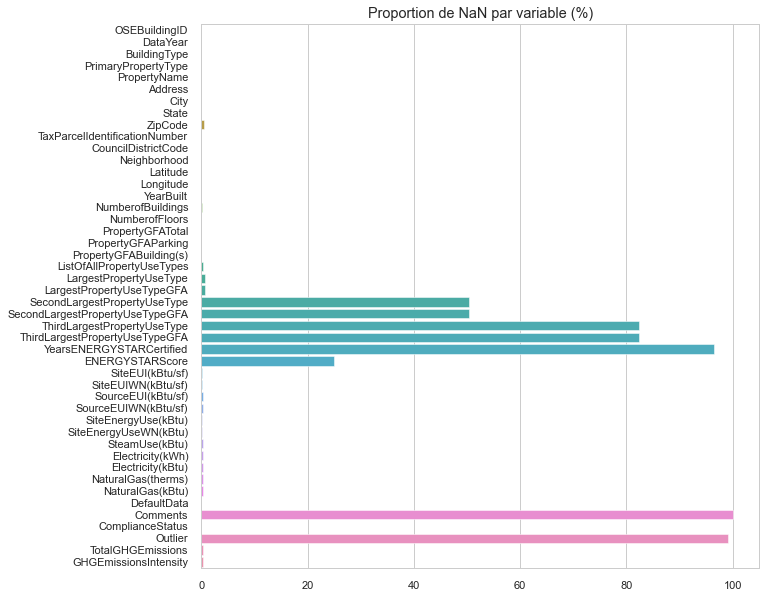

In [103]:
# Visualisation des % NaN par variables
percent = round(df.isnull().sum()/df.isnull().count()*100,1) # Calcul le pourcentage des valeurs arrondi
plt.figure(figsize=(10,10))
plt.title('Proportion de NaN par variable (%)')
sns.barplot(x= percent.values, y= percent.index)

<AxesSubplot:title={'center':'Visualisation des valeurs manquantes'}>

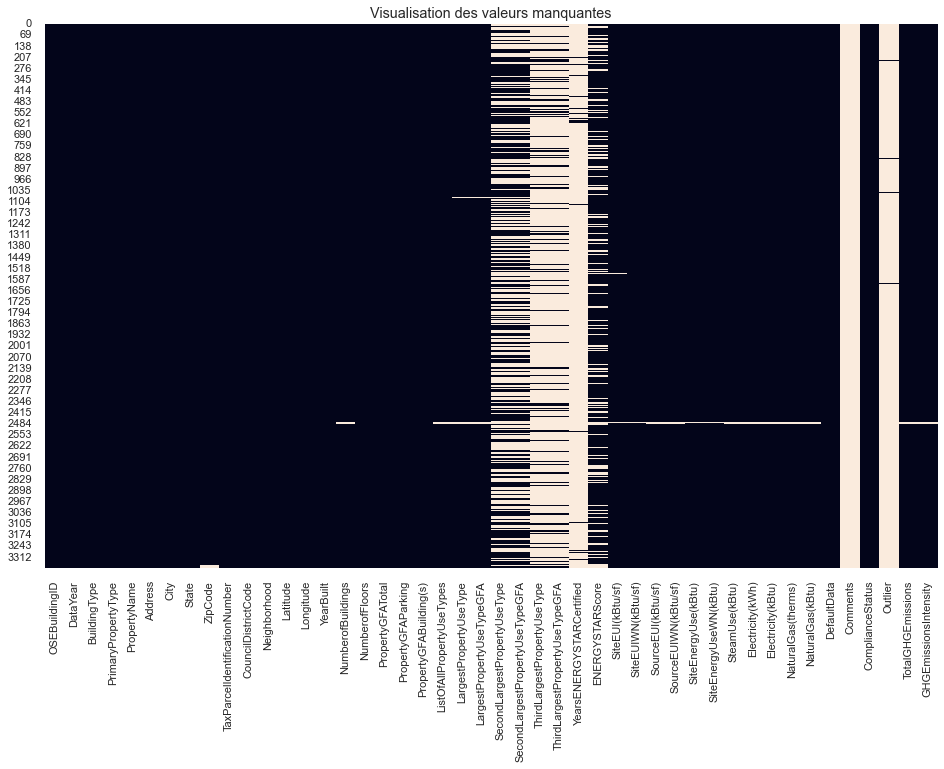

In [104]:
# visialisation par Whitegrid des données manquantes
sns.set_style('whitegrid')
plt.figure(figsize=(16,10)) #Réglage de la taille
plt.title("Visualisation des valeurs manquantes") #titre 
sns.heatmap(df.isnull(), cbar=False) #Affichage de la carte thermique

<AxesSubplot:>

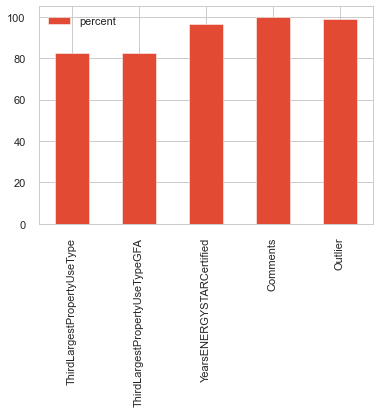

In [105]:
# % des données manquantes par variables ( années) arrondi > 75%
percent=round(df.isnull().sum()/df.isnull().count()*100,2)
percent_selection =percent[percent> 75.0]
percent_selection=pd.DataFrame(percent_selection, columns=['percent'])
percent_selection.plot.bar(y='percent')

In [106]:
#suppression des variables dont les Valeurs manquantes dépassent 80%
df=drop_unpopulated_column(df,0.75)


Dropping variable ThirdLargestPropertyUseType from  ['df'] with % missing 0.82
Dropping variable ThirdLargestPropertyUseTypeGFA from  ['df'] with % missing 0.82
Dropping variable YearsENERGYSTARCertified from  ['df'] with % missing 0.96
Dropping variable Comments from  ['df'] with % missing 1.0
Dropping variable Outlier from  ['df'] with % missing 0.99


## Explication des variables

In [107]:
# supression des valeurs que nous n'avons pas besoin pour l'analyse
df=df.drop(['ZipCode','SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseType','State','City',
                  'TaxParcelIdentificationNumber','ComplianceStatus','DefaultData','PropertyName','Electricity(kWh)',
                  'NaturalGas(therms)'], axis=1)

## Univariate Analysis

In [108]:
## Séparation en deux catégories, num et cat
cat_df=df[['LargestPropertyUseType','BuildingType', 'PrimaryPropertyType', 'Neighborhood']]
num_df=df[['ENERGYSTARScore', 'LargestPropertyUseTypeGFA', 'TotalGHGEmissions',
       'NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)',
       'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity',
       'NumberofBuildings', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)', 'PropertyGFAParking',
       'CouncilDistrictCode', 'YearBuilt','PropertyGFABuilding(s)', 'NumberofFloors', 'PropertyGFATotal']]

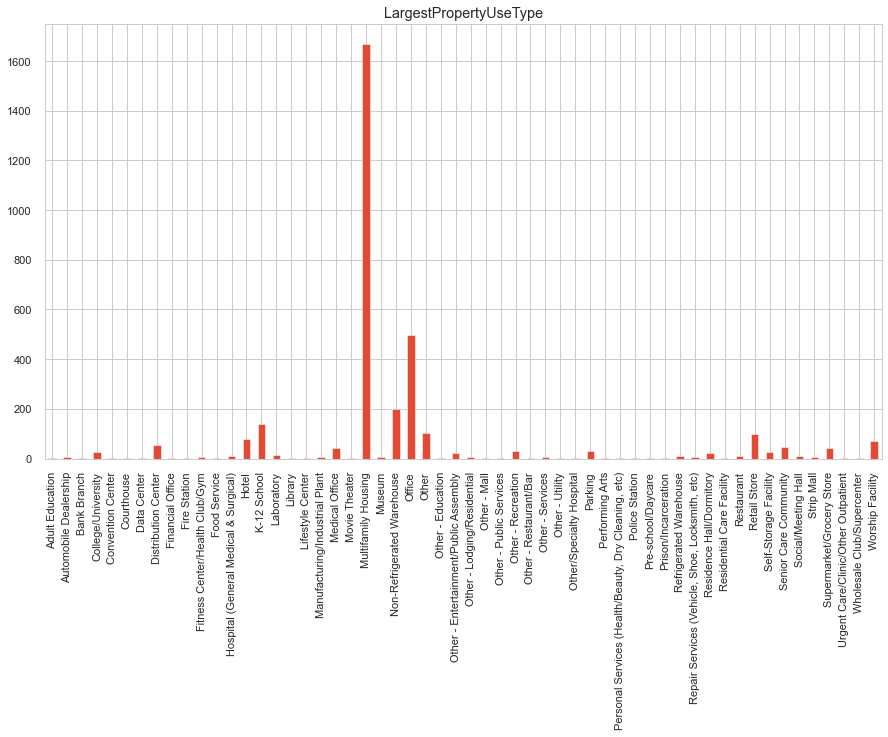

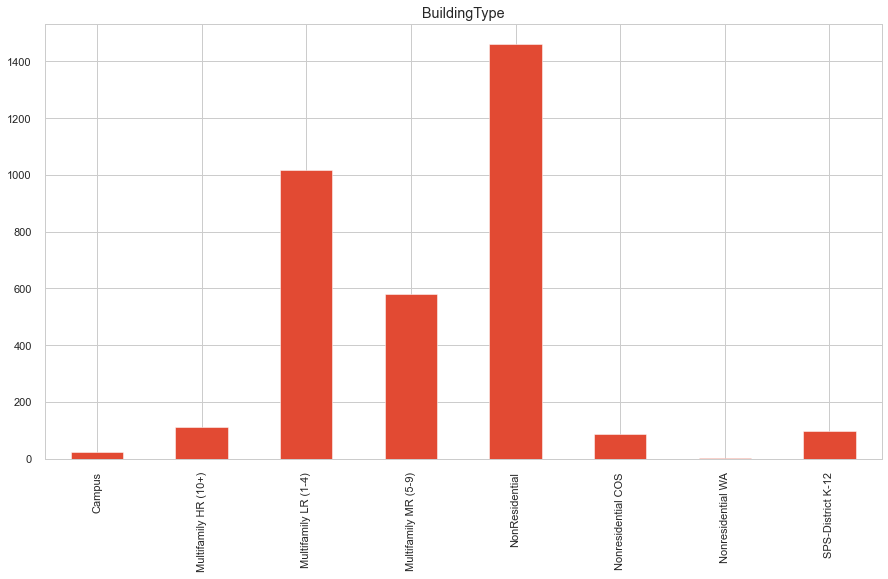

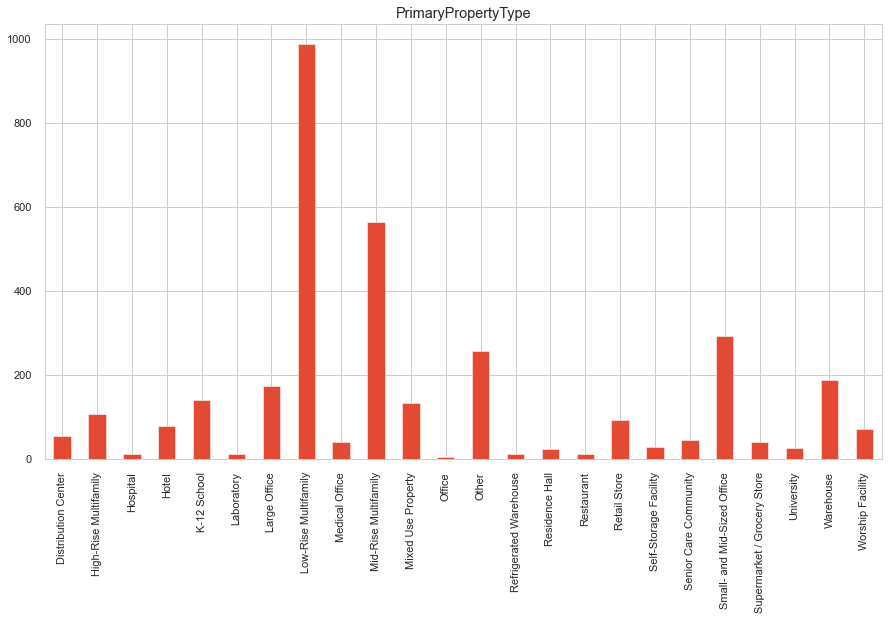

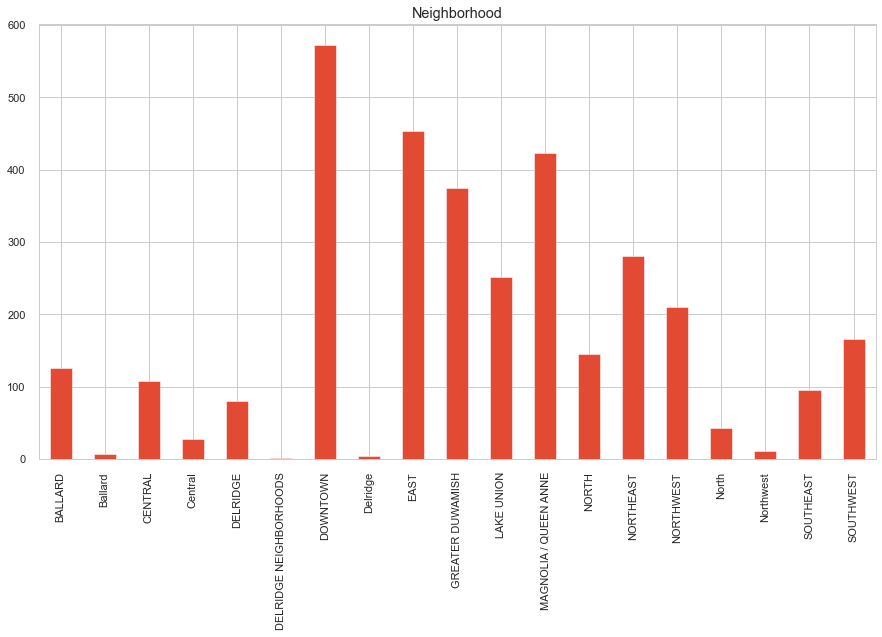

In [109]:
for column in cat_df:
    fig = plt.figure(figsize=(15,8))
    df[column].value_counts().sort_index(axis=0).plot(kind='bar')
    plt.title(column)
    plt.show()

In [110]:
df['ListOfAllPropertyUseTypes'].value_counts()/df['ListOfAllPropertyUseTypes'].value_counts().sum()*100

Multifamily Housing                                                                       25.720226
Multifamily Housing, Parking                                                              13.780814
Office                                                                                     4.128304
K-12 School                                                                                4.009504
Office, Parking                                                                            3.564004
                                                                                            ...    
Other, Parking, Restaurant, Retail Store                                                   0.029700
Non-Refrigerated Warehouse, Other, Parking, Retail Store                                   0.029700
Data Center, Non-Refrigerated Warehouse, Office, Retail Store                              0.029700
Data Center, Medical Office, Office, Parking, Restaurant                                   0.029700


In [111]:
num_df.describe()

,ENERGYSTARScore,LargestPropertyUseTypeGFA,TotalGHGEmissions,NaturalGas(kBtu),Electricity(kBtu),SteamUse(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),GHGEmissionsIntensity,NumberofBuildings,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu),PropertyGFAParking,CouncilDistrictCode,YearBuilt,PropertyGFABuilding(s),NumberofFloors,PropertyGFATotal
count,2533.000000,3.356000e+03,3367.000000,3.367000e+03,3.367000e+03,3.367000e+03,3367.000000,3367.000000,3367.000000,3368.000000,3369.000000,3370.000000,3.370000e+03,3.371000e+03,3376.000000,3376.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03
mean,67.918674,7.917764e+04,119.723971,1.368505e+06,3.707612e+06,2.745959e+05,137.783932,134.232848,1.175916,1.106888,54.732116,57.033798,5.276726e+06,5.403667e+06,8001.526066,4.439277,1968.573164,8.683201e+04,4.709123,9.483354e+04
std,26.873271,2.017034e+05,538.832227,6.709781e+06,1.485066e+07,3.912173e+06,139.109807,139.287554,1.821452,2.108402,56.273124,57.163330,1.593879e+07,2.161063e+07,32326.723928,2.120625,33.088156,2.079398e+05,5.494465,2.188376e+05
min,1.000000,5.656000e+03,-0.800000,0.000000e+00,-1.154170e+05,0.000000e+00,-2.100000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1900.000000,3.636000e+03,0.000000,1.128500e+04
25%,53.000000,2.509475e+04,9.495000,0.000000e+00,6.394870e+05,0.000000e+00,78.400002,74.699997,0.210000,1.000000,27.900000,29.400000,9.701822e+05,9.251286e+05,0.000000,3.000000,1948.000000,2.775600e+04,2.000000,2.848700e+04
50%,75.000000,3.989400e+04,33.920000,3.237540e+05,1.177583e+06,0.000000e+00,101.099998,96.199997,0.610000,1.000000,38.599998,40.900002,1.904452e+06,1.803753e+06,0.000000,4.000000,1975.000000,4.321600e+04,4.000000,4.417500e+04
75%,90.000000,7.620025e+04,93.940000,1.189034e+06,2.829632e+06,0.000000e+00,148.349998,143.899994,1.370000,1.000000,60.400002,64.275002,4.381429e+06,4.222455e+06,0.000000,7.000000,1997.000000,8.427625e+04,5.000000,9.099200e+04
max,100.000000,9.320156e+06,16870.980000,2.979090e+08,6.570744e+08,1.349435e+08,2620.000000,2620.000000,34.090000,111.000000,834.400024,834.400024,4.716139e+08,8.739237e+08,512608.000000,7.000000,2015.000000,9.320156e+06,99.000000,9.320156e+06


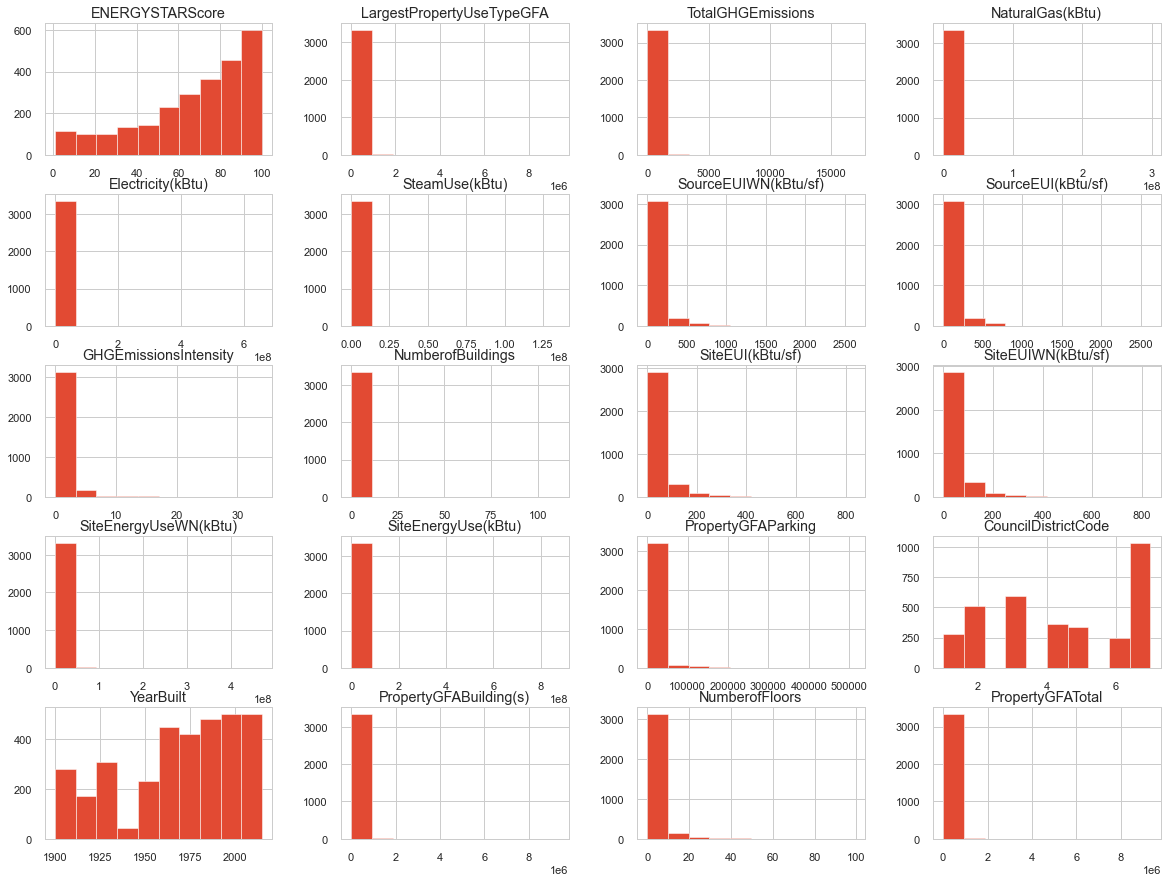

In [112]:
num_df.hist(figsize=(20,15))
plt.show()

## Multivariate Analysis

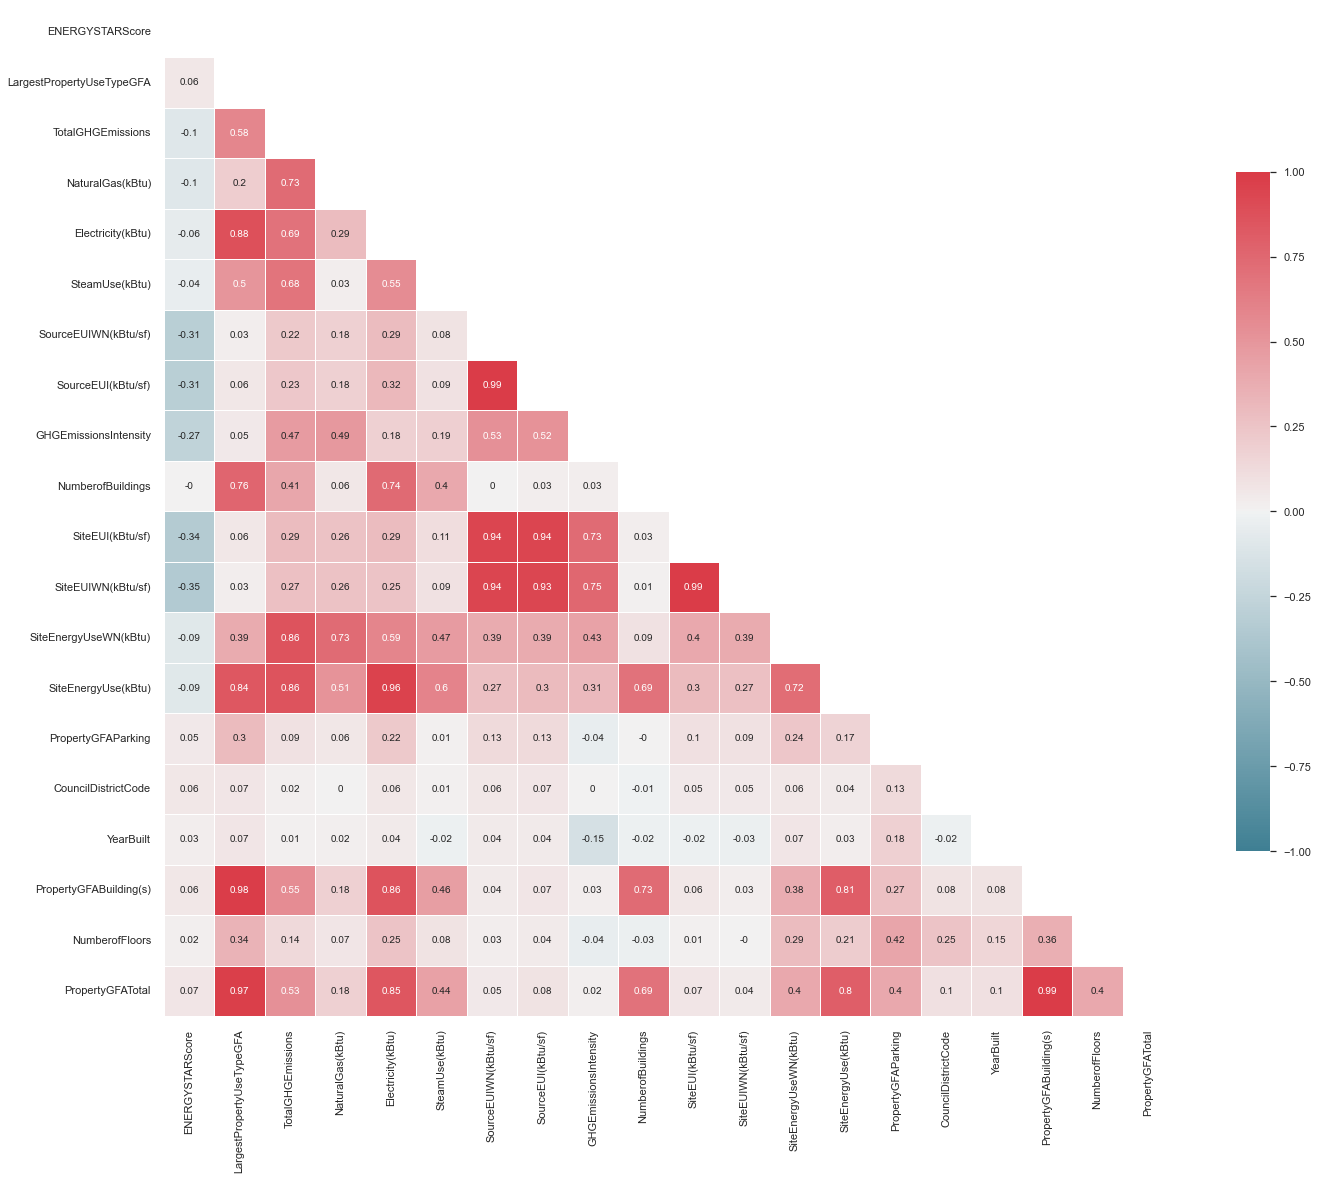

In [113]:
# générer et visualiser la matrice de corrélation
corr =num_df.corr().round(2)

# Mask pour le triange supérieur
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Définir la taille
f, ax = plt.subplots(figsize=(20, 20))

# definir colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [114]:
# définir les correlation les plus fortes
threshold = 0.8
corr_pairs = num_df.corr().unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
32,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),0.994317
30,SiteEUIWN(kBtu/sf),SiteEUI(kBtu/sf),0.993549
28,PropertyGFABuilding(s),PropertyGFATotal,0.989823
26,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),0.978422
24,LargestPropertyUseTypeGFA,PropertyGFATotal,0.974113
22,Electricity(kBtu),SiteEnergyUse(kBtu),0.956556
20,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.944141
18,SiteEUI(kBtu/sf),SourceEUIWN(kBtu/sf),0.940204
16,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),0.938051
14,SourceEUI(kBtu/sf),SiteEUIWN(kBtu/sf),0.930434


<function matplotlib.pyplot.show(close=None, block=None)>

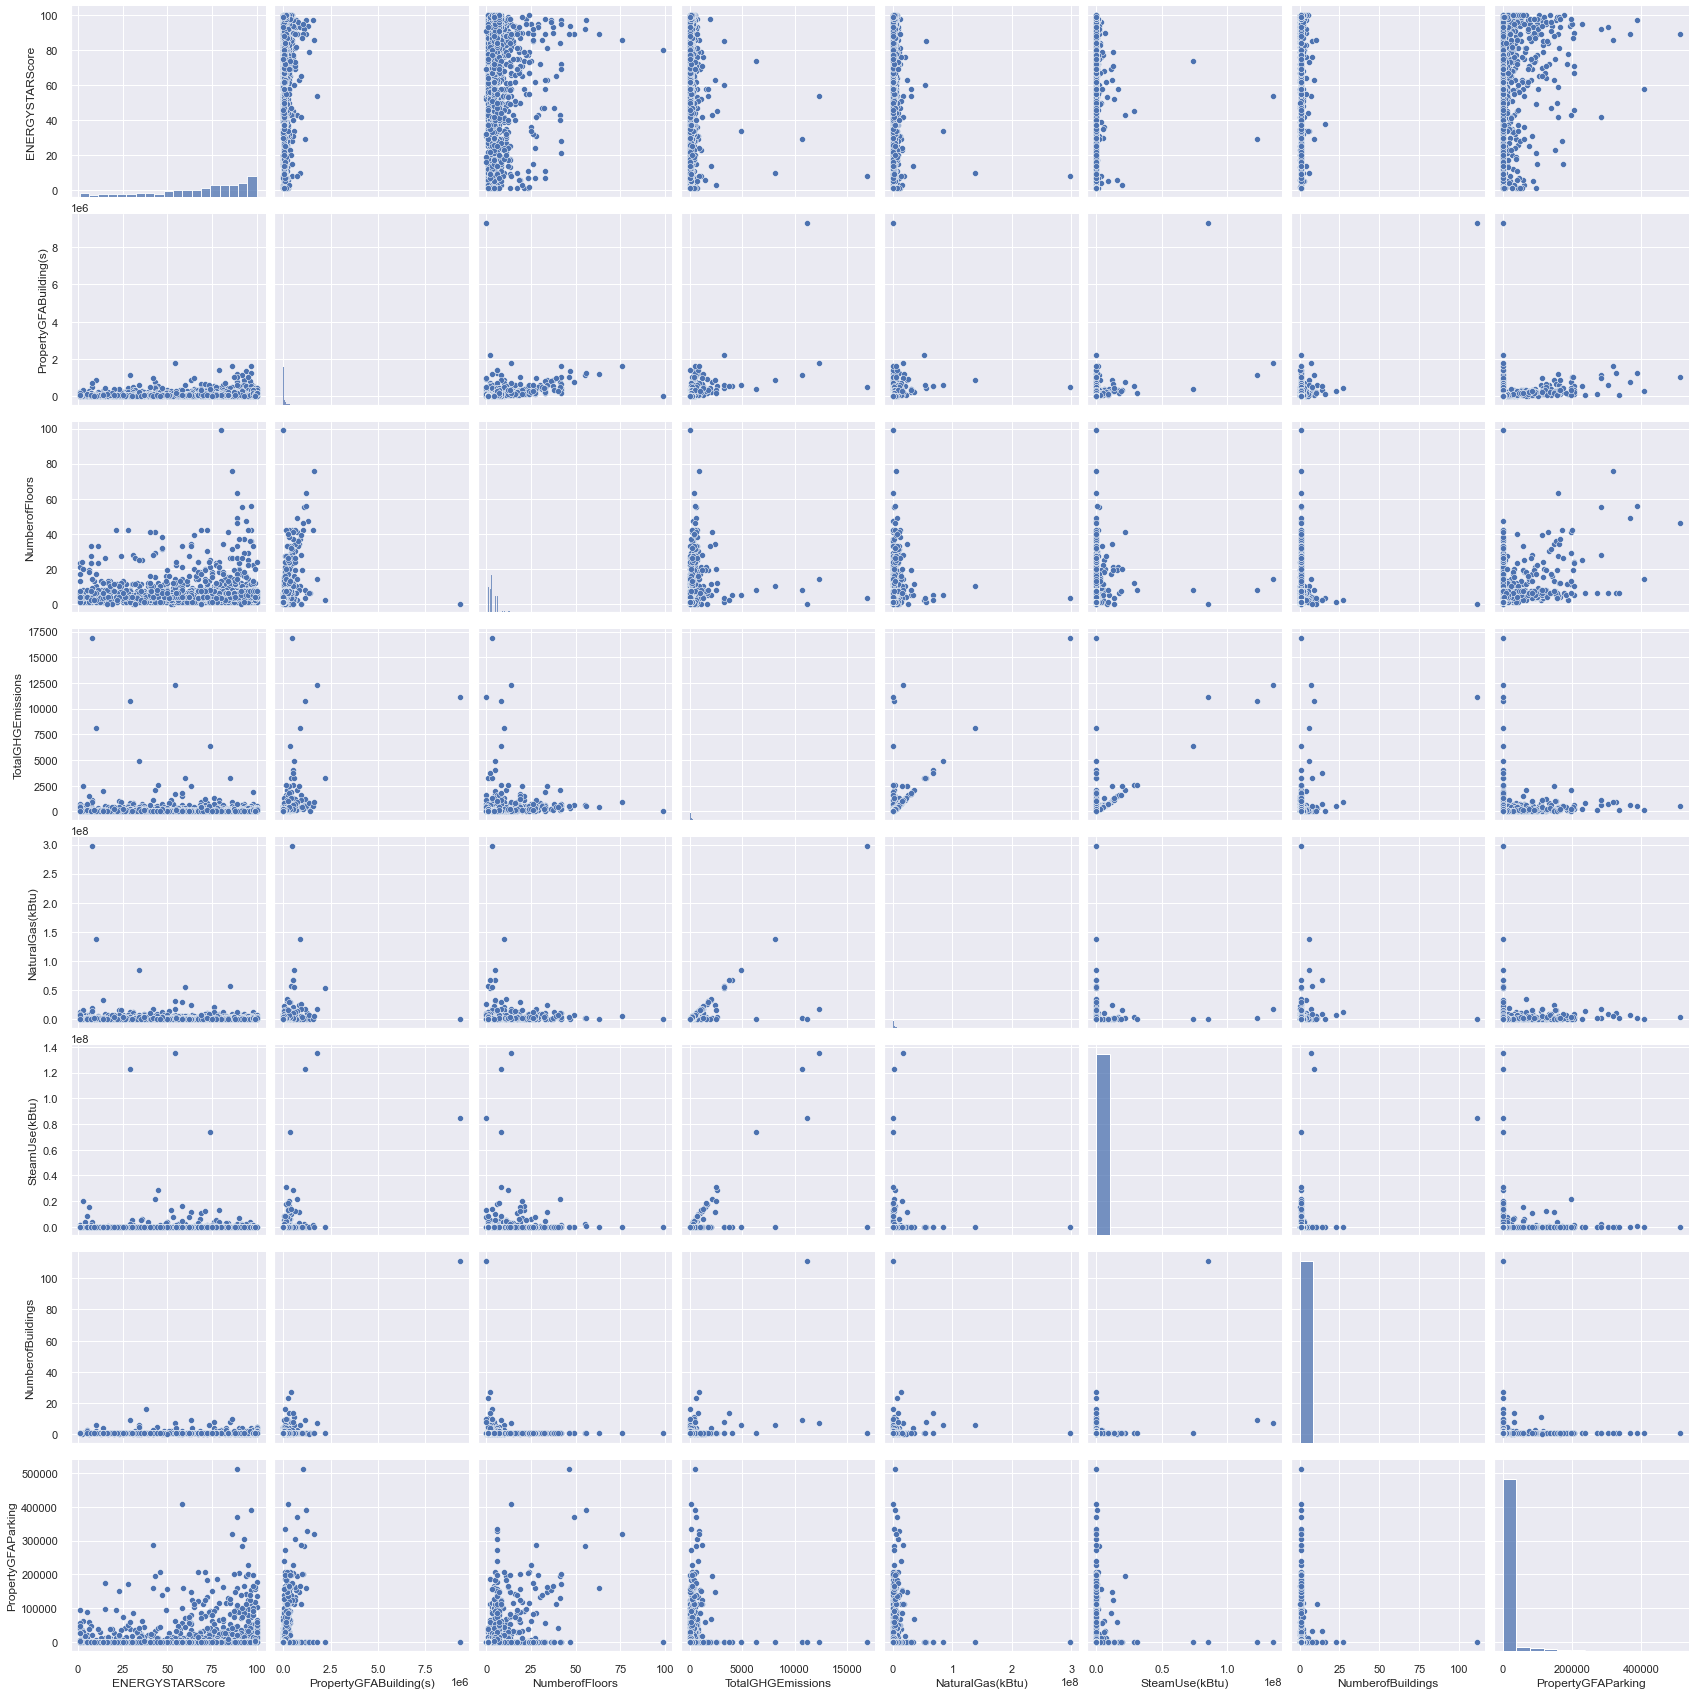

In [115]:
sns.set()
sns.pairplot(df[['ENERGYSTARScore', 'PropertyGFABuilding(s)','NumberofFloors','TotalGHGEmissions','NaturalGas(kBtu)', 'SteamUse(kBtu)',
       'NumberofBuildings','PropertyGFAParking']], size=3)
plt.show

In [116]:
num_df=df[['ENERGYSTARScore','TotalGHGEmissions','NaturalGas(kBtu)', 'SteamUse(kBtu)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)','NumberofFloors','NumberofBuildings',
       'YearBuilt', 'DataYear', 'PropertyGFABuilding(s)', 'PropertyGFAParking',
       'OSEBuildingID']]

In [117]:
# imputation des valeurs manquantes par la méthode fillna( mode et mean)
cat_df=cat_df.fillna(cat_df.mode().iloc[0])
num_df=num_df.fillna(num_df.mean().iloc[0])

In [118]:
data=pd.merge(num_df,cat_df, left_index=True, right_index=True)
data

,ENERGYSTARScore,TotalGHGEmissions,NaturalGas(kBtu),SteamUse(kBtu),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),NumberofFloors,NumberofBuildings,YearBuilt,DataYear,PropertyGFABuilding(s),PropertyGFAParking,OSEBuildingID,LargestPropertyUseType,BuildingType,PrimaryPropertyType,Neighborhood
0,60.000000,249.98,1.276453e+06,2003882.00,182.500000,7.226362e+06,12,1.0,1927,2016,88434,0,1,Hotel,NonResidential,Hotel,DOWNTOWN
1,61.000000,295.86,5.145082e+06,0.00,176.100006,8.387933e+06,11,1.0,1996,2016,88502,15064,2,Hotel,NonResidential,Hotel,DOWNTOWN
2,43.000000,2089.28,1.493800e+06,21566554.00,241.899994,7.258702e+07,41,1.0,1969,2016,759392,196718,3,Hotel,NonResidential,Hotel,DOWNTOWN
3,56.000000,286.43,1.811213e+06,2214446.25,216.199997,6.794584e+06,10,1.0,1926,2016,61320,0,5,Hotel,NonResidential,Hotel,DOWNTOWN
4,75.000000,505.01,8.803998e+06,0.00,211.399994,1.417261e+07,18,1.0,1980,2016,113580,62000,8,Hotel,NonResidential,Hotel,DOWNTOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,46.000000,20.94,3.254750e+05,0.00,161.699997,8.497457e+05,1,1.0,1990,2016,12294,0,50222,Office,Nonresidential COS,Office,GREATER DUWAMISH
3372,67.918674,32.17,5.537300e+05,0.00,114.199997,9.502762e+05,1,1.0,2004,2016,16000,0,50223,Other - Recreation,Nonresidential COS,Other,DOWNTOWN
3373,67.918674,223.54,3.973739e+06,0.00,744.799988,5.765898e+06,1,1.0,1974,2016,13157,0,50224,Other - Recreation,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE
3374,67.918674,22.11,3.706010e+05,0.00,105.300003,7.194712e+05,1,1.0,1989,2016,14101,0,50225,Other - Recreation,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH


In [119]:
data_set_overview(data)

--------------------------------------------------------------------------
Data : ['_', 'data', '_118']
Nbr de variables : 17
Nbr d observations : 3376
cellules_manquantes : 0
cellules_manquantes in % : 0.00%
Duplicate rows : 0
Duplicate rows in % : 0.00%


# Exploratory Data Analysis

# Feature Engineering


## Création de nouvelles variables

In [120]:
df_ss=data

In [121]:
# Création de nouvelles variables 
df_ss['energy_per_GFABuilding'] = round((df_ss['SiteEnergyUse(kBtu)'].fillna(0)/
                                         df_ss['PropertyGFABuilding(s)'].fillna(0)),3)
df_ss['Source_EUI_GFABuilding'] = round((df_ss['SourceEUI(kBtu/sf)'].fillna(0)/
                                         df_ss['PropertyGFABuilding(s)'].fillna(0)),3)
df_ss['Age'] = df_ss['DataYear']- df_ss['YearBuilt']

## Traitement, supression des variables

In [122]:
df_ss.drop(['DataYear','YearBuilt'], axis=1, inplace=True)


In [123]:
# supression des nan et 0 pour les variables qui font partie de la selection
index_with_nan = df_ss['TotalGHGEmissions'].index[df_ss['TotalGHGEmissions'].isnull()]
df_ss = df_ss.drop(index=index_with_nan)
index_a_zero = df_ss['TotalGHGEmissions'].index[df_ss['TotalGHGEmissions']==0]
df_ss = df_ss.drop(index=index_a_zero)

index_with_nan = df_ss['SiteEnergyUse(kBtu)'].index[df_ss['SiteEnergyUse(kBtu)'].isnull()]
df_ss = df_ss.drop(index=index_with_nan)
index_a_zero = df_ss['SiteEnergyUse(kBtu)'].index[df_ss['SiteEnergyUse(kBtu)']==0]
df_ss = df_ss.drop(index=index_a_zero)

In [124]:
#Il est précisié dans le projet que seuls les bâtiments non destinés à l'habitation seront étudiés. 
#Nous allons donc supprimer toutes les lignes correspondant à des habitations en nous basant sur la variable BuildingType
df_ss['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [125]:
df_ss['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [126]:
df_ss['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other

In [127]:
#Supression de Multifamily
df_ss = df_ss[~df_ss['BuildingType'].str.contains("Multifamily")]
df_ss = df_ss[~df_ss['PrimaryPropertyType'].str.contains("Multifamily")]

index_largeproperty_todrop=df_ss[df_ss['LargestPropertyUseType']=='Multifamily Housing'].index
df_ss.drop(index_largeproperty_todrop, inplace=True)


In [128]:
# Actualiser la sous-variable Delridge
df_ss['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
df_ss['Neighborhood']=df_ss['Neighborhood'].map(lambda x: x.upper())

In [129]:
#Supression des doublons Restaurant et Restaurant et bar
index_largeproperty_todrop=df_ss[df_ss['LargestPropertyUseType']=='Restaurant'].index
df_ss.drop(index_largeproperty_todrop, inplace=True)

#Supression des doublons University et University et colège
index_largeproperty_todrop=df_ss[df_ss['LargestPropertyUseType']=='University'].index
df_ss.drop(index_largeproperty_todrop, inplace=True)

In [130]:
#Suppression des variables avec suffixe WN (ajustement weather )
df_ss.drop(search_componant(df_ss,'WN'), axis=1, inplace=True)

In [131]:
# Supression de variables pour éviter la duplication des types de batiments et alleger la data etant donné que la localisation est définie par une autre variable
df_ss.drop(['Neighborhood', 'BuildingType'], axis=1, inplace=True)

In [132]:
df_ss['PrimaryPropertyType'] = df_ss['PrimaryPropertyType'].str.replace('\n','')

In [133]:
# les valeurs négative
df_ss_negative=df_ss.min()
df_ss_negative

ENERGYSTARScore                           1.0
TotalGHGEmissions                        -0.8
NaturalGas(kBtu)                          0.0
SteamUse(kBtu)                            0.0
SourceEUI(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)               16808.90039
NumberofFloors                              0
NumberofBuildings                         0.0
PropertyGFABuilding(s)                   3636
PropertyGFAParking                          0
OSEBuildingID                               1
LargestPropertyUseType        Adult Education
PrimaryPropertyType       Distribution Center
energy_per_GFABuilding                  0.418
Source_EUI_GFABuilding                    0.0
Age                                         1
dtype: object

In [134]:
#Supression des valeurs négative
df_ss[df_ss['TotalGHGEmissions']<0]
index_to_drop=df_ss[df_ss['TotalGHGEmissions']<0].index
df_ss.drop(index_to_drop, inplace=True)


In [135]:
df_cat=df_ss[['PrimaryPropertyType']]

In [136]:
df_num2=df_ss[['ENERGYSTARScore', 'TotalGHGEmissions', 'Source_EUI_GFABuilding',
       'energy_per_GFABuilding', 'OSEBuildingID', 'PropertyGFAParking',
       'NumberofFloors', 'SiteEnergyUse(kBtu)','SteamUse(kBtu)', 'NaturalGas(kBtu)', 'Age']]

In [137]:
#Concatenation
new_data=pd.concat([df_num2,df_cat], axis=1)
new_data.replace([np.inf, -np.inf], 0, inplace=True)

In [138]:
new_data.describe()

,ENERGYSTARScore,TotalGHGEmissions,Source_EUI_GFABuilding,energy_per_GFABuilding,OSEBuildingID,PropertyGFAParking,NumberofFloors,SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),Age
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1.620000e+03,1.620000e+03,1.620000e+03,1620.000000
mean,66.221908,187.226296,0.003888,75.932754,16333.249383,13160.107407,4.138889,8.577509e+06,5.271271e+05,1.978044e+06,54.035802
std,23.338166,762.064397,0.006390,113.404482,13854.277026,42770.145802,6.594107,3.064647e+07,5.591041e+06,9.492874e+06,32.598934
min,1.000000,0.120000,0.000000,0.418000,1.000000,0.000000,0.000000,1.680890e+04,0.000000e+00,0.000000e+00,1.000000
25%,62.000000,20.297500,0.001000,33.961250,583.750000,0.000000,1.000000,1.253390e+06,0.000000e+00,0.000000e+00,27.000000
50%,67.918674,49.735000,0.002000,51.524000,21147.500000,0.000000,2.000000,2.572873e+06,0.000000e+00,5.038200e+05,51.000000
75%,82.000000,142.367500,0.005000,83.480500,24599.250000,0.000000,4.000000,6.968646e+06,0.000000e+00,1.483314e+06,86.000000
max,100.000000,16870.980000,0.154000,3341.232000,50226.000000,512608.000000,99.000000,8.739237e+08,1.349435e+08,2.979090e+08,116.000000


## Normalisation et dummisation de la data

In [140]:
# definir min max scaler
scaler = MinMaxScaler()
# transform data
new_data.iloc[:,0:11] = scaler.fit_transform(new_data.iloc[:,0:11] )
new_data

,ENERGYSTARScore,TotalGHGEmissions,Source_EUI_GFABuilding,energy_per_GFABuilding,OSEBuildingID,PropertyGFAParking,NumberofFloors,SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),Age,PrimaryPropertyType
0,0.595960,0.014810,0.012987,0.024334,0.000000,0.000000,0.121212,0.008250,0.014850,0.004285,0.765217,Hotel
1,0.606061,0.017530,0.012987,0.028244,0.000020,0.029387,0.111111,0.009579,0.000000,0.017271,0.165217,Hotel
2,0.424242,0.123832,0.000000,0.028486,0.000040,0.383759,0.414141,0.083041,0.159819,0.005014,0.400000,Hotel
3,0.555556,0.016971,0.025974,0.033042,0.000080,0.000000,0.101010,0.007756,0.016410,0.006080,0.773913,Hotel
4,0.747475,0.029927,0.012987,0.037225,0.000139,0.120950,0.181818,0.016198,0.000000,0.029553,0.304348,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0.454545,0.001234,0.084416,0.020564,0.999920,0.000000,0.010101,0.000953,0.000000,0.001093,0.217391,Office
3372,0.675946,0.001900,0.045455,0.017653,0.999940,0.000000,0.010101,0.001068,0.000000,0.001859,0.095652,Other
3373,0.675946,0.013243,0.370130,0.131052,0.999960,0.000000,0.010101,0.006579,0.000000,0.013339,0.356522,Other
3374,0.675946,0.001303,0.045455,0.015148,0.999980,0.000000,0.010101,0.000804,0.000000,0.001244,0.226087,Mixed Use Property


In [141]:
# Index
new_data.set_index('OSEBuildingID', inplace=True)

In [142]:
# Dummisation des données
new_data_dummies=pd.get_dummies(new_data, drop_first=True)
new_data_dummies.columns

Index(['ENERGYSTARScore', 'TotalGHGEmissions', 'Source_EUI_GFABuilding',
       'energy_per_GFABuilding', 'PropertyGFAParking', 'NumberofFloors',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'Age',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_Universit

In [143]:
clean_dataset(new_data_dummies)

,ENERGYSTARScore,TotalGHGEmissions,Source_EUI_GFABuilding,energy_per_GFABuilding,PropertyGFAParking,NumberofFloors,SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),Age,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
0.000000,0.595960,0.014810,0.012987,0.024334,0.000000,0.121212,0.008250,0.014850,0.004285,0.765217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.000020,0.606061,0.017530,0.012987,0.028244,0.029387,0.111111,0.009579,0.000000,0.017271,0.165217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.000040,0.424242,0.123832,0.000000,0.028486,0.383759,0.414141,0.083041,0.159819,0.005014,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.000080,0.555556,0.016971,0.025974,0.033042,0.000000,0.101010,0.007756,0.016410,0.006080,0.773913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.000139,0.747475,0.029927,0.012987,0.037225,0.120950,0.181818,0.016198,0.000000,0.029553,0.304348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.999920,0.454545,0.001234,0.084416,0.020564,0.000000,0.010101,0.000953,0.000000,0.001093,0.217391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.999940,0.675946,0.001900,0.045455,0.017653,0.000000,0.010101,0.001068,0.000000,0.001859,0.095652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.999960,0.675946,0.013243,0.370130,0.131052,0.000000,0.010101,0.006579,0.000000,0.013339,0.356522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
new_data_dummies.to_csv('data_finale.csv')